## Frequency

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from tqdm.notebook import tqdm

In [14]:
@njit()
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@njit()
def H_Chimera(u,t=0,args = args):
    r1 = u[0]
    r2 = u[1]
    phi = u[2]
    beta,alpha,eta1,eta2 = args
    dr1 = 1/2 * r1* (1-r1**2)*(eta1**2 * r1**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r1*r2*np.cos(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.cos(alpha + 2*phi))
    dr2 = 1/2 * r2* (1-r2**2)*(eta2**2 * r2**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r2*r1*np.cos(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.cos(alpha - 2*phi))
    dpsi1 = -1/2 * (1+r1**2)*(eta1**2 * r1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r1*r2*np.sin(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.sin(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r2**2)*(eta2**2 * r2**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r2*r1*np.sin(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.sin(alpha - 2*phi))
    dphi = dpsi1 - dpsi2
    return np.array([dr1,dr2,dphi])



def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])


In [115]:

alpha = 1
beta = 0.4
eta1 = 0.1
eta2 = 0.05

args = beta,alpha,eta1,eta2
t = np.arange(0,60000,0.1)
y = np.linspace(0,0,1)
x = np.linspace(0,2*np.pi,5)
X,Y = np.meshgrid(x,y)
fx = 0.5
fy = 0.5

In [116]:
u[:,2]

array([-1.50048744, -1.50050494, -1.50052243, ..., -7.5350513 ,
       -7.53506296, -7.53507463])

<Axes: >

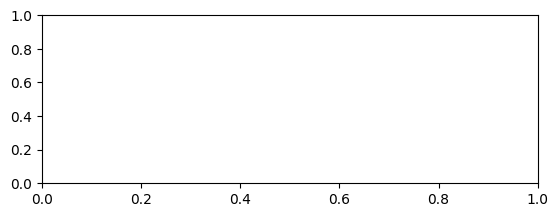

In [117]:
plt.subplot(2,1,1)

In [176]:
t = np.arange(0,50000,0.1)


In [119]:
R1s = np.linspace(0,1,20)
R2s = np.linspace(0,1,20)

R1X,R2Y = np.meshgrid(R1s,R2s)
r1x,r2y = R1X.flatten(),R2Y.flatten()

S_R1s,S_R2s = [],[]
S_PHIS = []


for r1,r2 in tqdm(list(zip(r1x,r2y))):
    u0 = [r1,r2,0]
    u = RK4(H_Chimera,np.array(u0,dtype=float),t,args=(args,))[-50000:]
    S_R1s.append(u[:,0])
    S_R2s.append(u[:,1])
    S_PHIS.append(u[:,2])


  0%|          | 0/400 [00:00<?, ?it/s]

In [177]:
R1s = np.linspace(0,1,20)
R2s = np.linspace(0,1,20)
phi_ = np.linspace(0,np.pi,20)


P1X,R2Y = np.meshgrid(phi_,R2s)
p1x,r2y = P1X.flatten(),R2Y.flatten()

S_R1s,S_R2s = [],[]
S_PHIS = []


for p,r2 in tqdm(list(zip(p1x,r2y))):
    u0 = [1,r2,p]
    u = RK4(H_Chimera,np.array(u0,dtype=float),t,args=(args,))[-50000:]
    S_R1s.append(u[:,0])
    S_R2s.append(u[:,1])
    S_PHIS.append(u[:,2])


  0%|          | 0/400 [00:00<?, ?it/s]

In [181]:
SR1 = np.array(S_R1s)
SR2 = np.array(S_R2s)
SPH = np.array(S_PHIS)

In [182]:
SSR2 = SR2[:,:].reshape(len(R1s),len(R2s),-1)
SSR1 = SR1[:,:].reshape(len(R1s),len(R2s),-1)
SSP = SPH[:,:].reshape(len(R1s),len(R2s),-1)

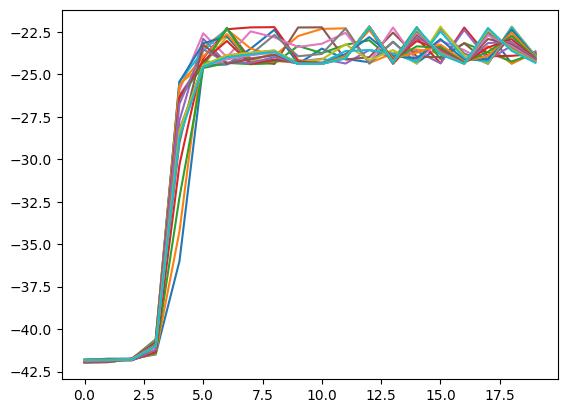

In [183]:
plt.plot(SSP[:,:,-1] - SSP[:,:,0])

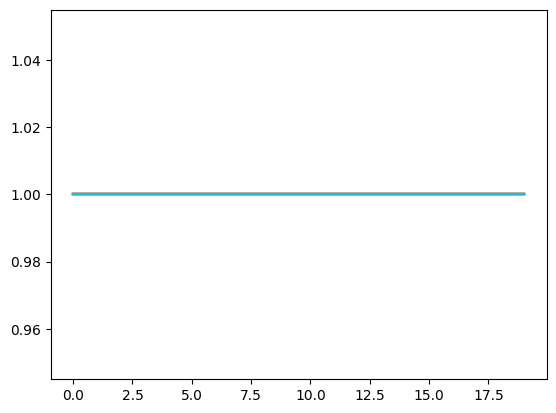

In [184]:
plt.plot(SSR1[:,:,-1])

[]

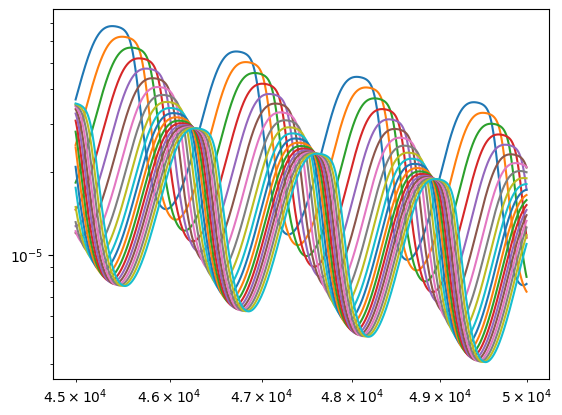

In [209]:
plt.plot(t[-50000:],1-SSR2[18,:].T);
plt.loglog()
# plt.plot(SSP[5,:].T%np.pi)


In [109]:
R1X[3]

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

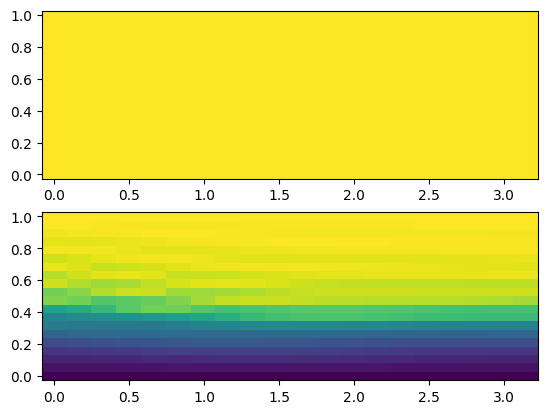

In [132]:
plt.subplot(2,1,1)
plt.pcolormesh(P1X,R2Y,SR1[:,-50].reshape(len(R1s),len(R2s)),vmin=0)
plt.subplot(2,1,2)
plt.pcolormesh(P1X,R2Y,SR2[:,-50].reshape(len(R1s),len(R2s)),vmin=0,vmax=1)

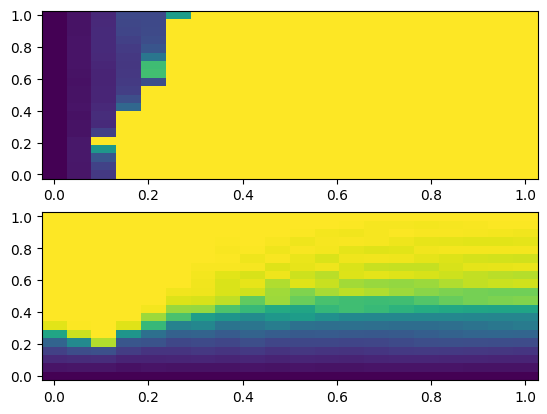

In [126]:
plt.subplot(2,1,1)
plt.pcolormesh(R1X,R2Y,SR1[:,-50].reshape(len(R1s),len(R2s)),vmin=0)
plt.subplot(2,1,2)
plt.pcolormesh(R1X,R2Y,SR2[:,-50].reshape(len(R1s),len(R2s)),vmin=0,vmax=1)

KeyboardInterrupt: 

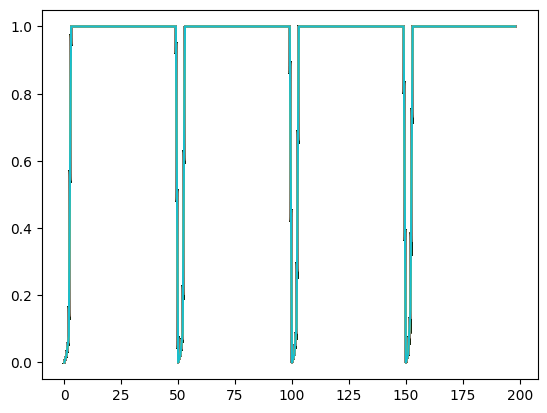

In [74]:
plt.plot()

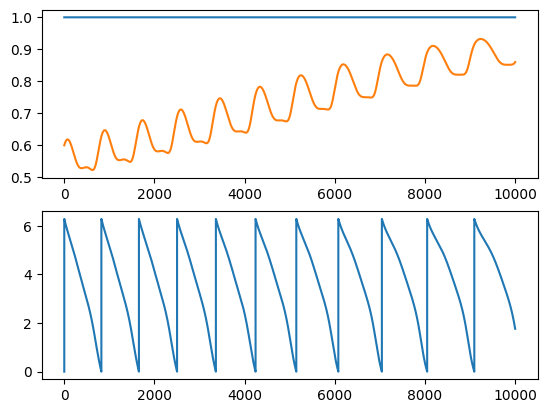

In [127]:
u0 = [1,0.6,0]
u = RK4(H_Chimera,np.array(u0,dtype=float),t,args=(args,))
plt.subplot(2,1,1)
plt.plot(t,u[:,:2])

plt.subplot(2,1,2)
plt.plot(t,u[:,2]%(np.pi*2))



In [ ]:
# beta = 0.7
# alpha = 1.2
# eta1 = 0.1
# eta2 = 0.05

alpha = 0.5
beta = 0.8
eta1 = 0.1
eta2 = 0.05

args = beta,alpha,eta1,eta2
t = np.arange(0,6000,0.1)
y = np.linspace(0,0,1)
x = np.linspace(0,2*np.pi,5)
X,Y = np.meshgrid(x,y)
fx = 0.5
fy = 0.5
# u0s = [[1-1e-3,0],[0 + 1e-3,1],[fx,fy]]
u0s = [[1,0.5,0],[0,0],[0.2,0],[0.3,0],[0.6, 0],[0.9114966199929684-0.1,3.072208206306462+0.1]]
# u0s = [[x_,y_] for x_,y_ in zip(X.flatten(),Y.flatten()) ]
plt.figure(dpi=500)
for i,u0 in enumerate(u0s):

	u = RK4(H_Chimera,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,0],u[0,1]%(np.pi*2),s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	else:	
		c = plt.scatter(u[0,0],u[0,1]%(np.pi*2),s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	plt.scatter(u[-1,0],u[-1,1]%(np.pi*2),s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.scatter(u[:,0],u[:,1]%(np.pi*2),s=1,alpha=0.8,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

plt.legend()
x = np.linspace(-0.1,1.2,30)
y = np.linspace(0,2*np.pi,30)
X,Y = np.meshgrid(x,y)

U,V = myFun2([X,Y],0,args)
M = (np.hypot(U,V))
# U = U / np.sqrt(U**2 + V**2);
# V = V / np.sqrt(U**2 + V**2);

# V = 0*V
xs = np.linspace(-3,-1e-5,1000)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);

# plt.axhline(0,color='black')
# plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(x,y,U,V,M,scale=20,pivot='mid',cmap='jet',zorder=3,alpha=0.7)
plt.colorbar()
plt.xlim(-0.1,1.1)
plt.ylim(0,2*np.pi)
# plt.legend()
ax =plt.gca()
xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')
# plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
# plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

